In [1]:
%matplotlib ipympl
from models import *
from impedance.models.circuits import CustomCircuit
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#freq Range
f=np.logspace(-3,3,100)
#lin params
R1=1000
Q=1e-4
R2=2000
alpha=0.95

#lin circuit
c_lin=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,alpha],circuit="TLMlinnew")
z_lin=c_lin.predict(f)

#ilin circuit
c_ilin=CustomCircuit(initial_guess=[R1,R1*Q,R2*Q,alpha],circuit="TLMilinnew")
z_ilin=c_ilin.predict(f)




C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\impedance\models\circuits\circuits.py:144: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")


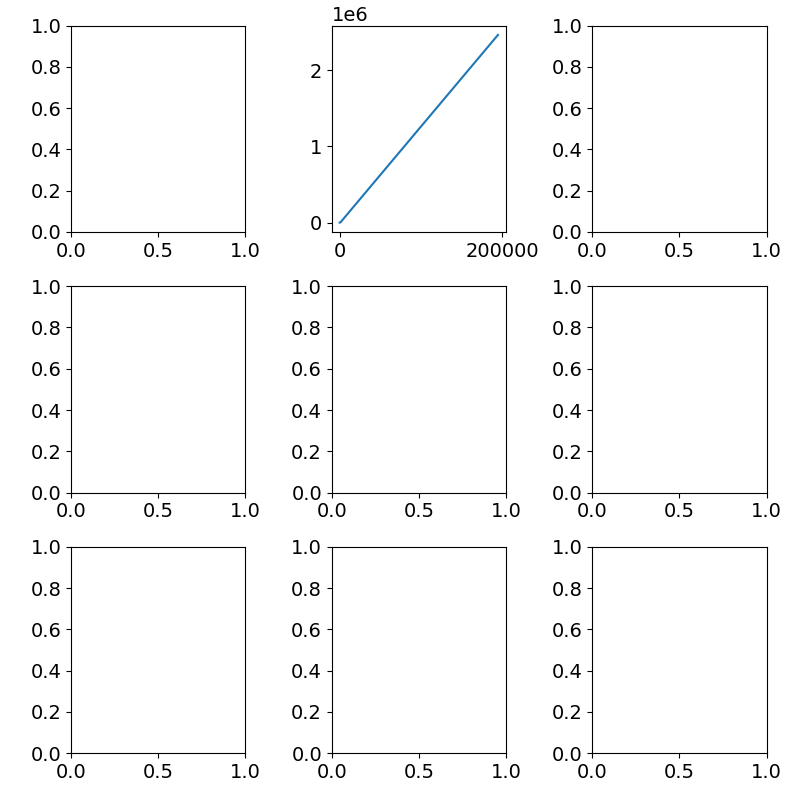

In [11]:
#set the fontsize, labelsizes and fonts etc. for the plots to be made below
plt.rcParams['font.size']=12
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14


fig, axs=plt.subplots(3,3)
fig.set_size_inches(8,8)
fig.tight_layout()

axs[0,1].plot(np.real(z_lin),-np.imag(z_lin))
